In [87]:
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
v=CountVectorizer()
v.fit(['mani is looking for a job'])
v.vocabulary_

{'mani': 4, 'is': 1, 'looking': 3, 'for': 0, 'job': 2}

In [3]:
c=CountVectorizer(ngram_range=(2,2))
c.fit(['mani is looking for a job'])
c.vocabulary_

{'mani is': 3, 'is looking': 1, 'looking for': 2, 'for job': 0}

In [4]:
b=CountVectorizer(ngram_range=(1,2))
b.fit(['mani is looking for a job'])
b.vocabulary_

{'mani': 7,
 'is': 2,
 'looking': 5,
 'for': 0,
 'job': 4,
 'mani is': 8,
 'is looking': 3,
 'looking for': 6,
 'for job': 1}

In [6]:
d=CountVectorizer(ngram_range=(1,3))
d.fit(['mani is looking for a job'])
d.vocabulary_

{'mani': 9,
 'is': 2,
 'looking': 6,
 'for': 0,
 'job': 5,
 'mani is': 10,
 'is looking': 3,
 'looking for': 7,
 'for job': 1,
 'mani is looking': 11,
 'is looking for': 4,
 'looking for job': 8}

In [8]:
nlp=spacy.load('en_core_web_sm')

In [13]:
def preprocess(text):
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [14]:
preprocess('mani ate pizza')

'mani eat pizza'

In [15]:
preprocess('mani is eating pizza')

'mani eat pizza'

In [16]:
corpus=[
    'Mani ate pizza',
    'Mani is tall',
    'Mani is eating pizza'
]

In [17]:
corpus_processed=[preprocess(text) for text in corpus]

In [18]:
corpus_processed

['Mani eat pizza', 'Mani tall', 'Mani eat pizza']

In [19]:
v=CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'mani': 2,
 'eat': 0,
 'pizza': 5,
 'mani eat': 3,
 'eat pizza': 1,
 'tall': 6,
 'mani tall': 4}

In [20]:
v.transform(['Mani eat pizza'])

<1x7 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [21]:
v.transform(['Mani eat pizza']).toarray()

array([[1, 1, 1, 1, 0, 1, 0]], dtype=int64)

In [36]:
df=pd.read_json('news_dataset.json')

In [37]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [38]:
df.shape

(12695, 2)

In [39]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [41]:
le=LabelEncoder()
df['category']=le.fit_transform(df['category'])

In [42]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,2
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,2
2,Entrepreneurs Today Don't Need a Big Budget to...,0
3,These Roads Could Recharge Your Electric Car A...,0
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,1


In [43]:
df.category.value_counts()

category
0    4254
3    4167
1    2893
2    1381
Name: count, dtype: int64

In [44]:
smote=SMOTE(sampling_strategy='minority')

In [48]:
samp=1381
df_0=df[df['category']==0].sample(samp,random_state=101)
df_1=df[df['category']==1].sample(samp,random_state=101)
df_3=df[df['category']==3].sample(samp,random_state=101)
df_2=df[df['category']==2]

In [49]:
df_balanced=pd.concat([df_0,df_1,df_2,df_3],axis=0)

In [50]:
df_balanced.head()

,text,category
1266,The Uncommon Reasons for the Rise of Stress Do...,0
690,Sexual Harassment Comes At A Cost. So Does Spe...,0
2906,5 Habits Of Highly Mobile Executives,0
1779,'Put Mustard On It': Fast-Food Workers Say Bur...,0
1730,Sweden To Experiment With Six-Hour Workday,0


In [52]:
df_balanced.category.value_counts()

category
0    1381
1    1381
2    1381
3    1381
Name: count, dtype: int64

In [53]:
def preprocessed_text(text):
    doc=nlp(text)
    pre_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        pre_tokens.append(token.lemma_)
    return ' '.join(pre_tokens)

In [56]:
df_balanced['pre_text']=df_balanced['text'].apply(preprocessed_text)

In [57]:
df_balanced

,text,category,pre_text
1266,The Uncommon Reasons for the Rise of Stress Do...,0,Uncommon Reasons rise Stress feel like unlimit...
690,Sexual Harassment Comes At A Cost. So Does Spe...,0,Sexual Harassment come cost speak price steep ...
2906,5 Habits Of Highly Mobile Executives,0,5 habit Highly Mobile Executives
1779,'Put Mustard On It': Fast-Food Workers Say Bur...,0,Mustard fast Food Workers Burns Rampant
1730,Sweden To Experiment With Six-Hour Workday,0,Sweden experiment hour Workday
...,...,...,...
524,Winnie The Pooh Is Trending On Twitter For The...,3,Winnie Pooh trend Twitter cutest Olympic Reaso...
187,These Jams From The Slam Dunk Contest Are Even...,3,Jams Slam Dunk Contest Sicker 360 blow away angle
1103,14 Michigan State Reps Reportedly Heard About ...,3,14 Michigan State Reps reportedly hear Abuser ...
11192,"Meet George Mumford, The NBA's Mindfulness Whi...",3,Meet George Mumford NBA Mindfulness Whisperer ...


In [60]:
X_train,X_test,y_train,y_test=train_test_split(df_balanced['pre_text'],df_balanced['category'],test_size=0.2,
                                              random_state=101,stratify=df_balanced['category'],shuffle=True)

In [61]:
X_train.shape

(4419,)

In [62]:
X_test.shape

(1105,)

In [64]:
clf=Pipeline([
    ('cv',CountVectorizer()),
    ('nv',MultinomialNB())
])

In [65]:
clf.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('nv', MultinomialNB())])

In [66]:
y_pred=clf.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       276
           1       0.85      0.94      0.89       276
           2       0.93      0.83      0.88       276
           3       0.89      0.87      0.88       277

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



In [71]:
clf2=Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,2))),
    ('nv',MultinomialNB())
])

In [73]:
clf2.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 2))),
                ('nv', MultinomialNB())])

In [74]:
y_pred2=clf2.predict(X_test)

In [75]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       276
           1       0.83      0.92      0.87       276
           2       0.93      0.81      0.86       276
           3       0.90      0.87      0.88       277

    accuracy                           0.87      1105
   macro avg       0.88      0.87      0.87      1105
weighted avg       0.88      0.87      0.87      1105



In [76]:
clf3=Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,3))),
    ('nv',MultinomialNB())
])

In [77]:
clf3.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 3))),
                ('nv', MultinomialNB())])

In [78]:
y_pred3=clf3.predict(X_test)

In [79]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       276
           1       0.84      0.92      0.88       276
           2       0.93      0.81      0.86       276
           3       0.90      0.87      0.89       277

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



In [80]:
X_test[:5]

12383    Cincinnati Zoo Premature Baby Hippo take Wobbl...
10573    woman Business Q&A Jenny Zack President LoveSp...
9189     Rushion McDonald Architect Steve Harvey Global...
9751     Ted Cruz wrong Planned Parenthood Shooting Sus...
1535     Chinese Diver pop question olympically romanti...
Name: pre_text, dtype: object

In [81]:
y_test[:5]

12383    2
10573    0
9189     0
9751     1
1535     3
Name: category, dtype: int32

In [82]:
y_pred3[:5]

array([2, 0, 0, 1, 3])

In [85]:
le.inverse_transform(clf3.predict(['real madrid is trying to win the champions league']))[0]

'SPORTS'

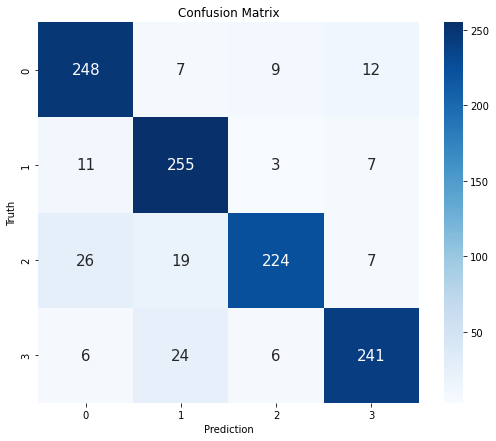

In [89]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()